In [19]:
import sys
sys.path.append("/Users/danielmunson/dev/simple_net")

from pprint import pprint

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from simple_net.components.network import Network
from simple_net.functions.utils import vectorize
from simple_net.functions.cost import (
    mean_squared_error,
    mse_gradient,
    arithmetic_mean
)
from simple_net.functions.activations import (
    sigmoid, ddx_sigmoid
)

from simple_net.misc.experimentation import generate_polynomial_map

In [21]:
layers = [5, 50, 5]
IN_DIMS = layers[0]
OUT_DIMS = layers[-1]
rand_poly, definition = generate_polynomial_map(IN_DIMS, OUT_DIMS)

NN = Network(
    layer_dims = layers,
    activations = [sigmoid for _ in layers],
    activation_derivatives = [ddx_sigmoid for _ in layers],
    cost_function = mean_squared_error,
    cost_gradient = mse_gradient,
    learning_rate = 1,
    gradient_aggregator = arithmetic_mean
)

In [22]:

# proof of gradient descent concept
# show that average cost is apprx. monotonic decreasing over time
test_features = [np.random.randn(IN_DIMS) for __ in range(500)]
test_answers = [rand_poly(ftrs) for ftrs in test_features]
for _ in range(200):
    NN.run_epoch(test_features, test_answers)


In [23]:
"""
baseline_input = [1 for _ in range(IN_DIMS)]
before = rand_poly(baseline_input)

for _ in range(1000):
    # twenty samples per batch
    test_features = [np.random.randn(IN_DIMS) for __ in range(50)]
    test_answers = [rand_poly(ftrs) for ftrs in test_features]
    NN.run_epoch(test_features, test_answers)
    
after = rand_poly(baseline_input)

print(before)
print(after)
"""

'\nbaseline_input = [1 for _ in range(IN_DIMS)]\nbefore = rand_poly(baseline_input)\n\nfor _ in range(1000):\n    # twenty samples per batch\n    test_features = [np.random.randn(IN_DIMS) for __ in range(50)]\n    test_answers = [rand_poly(ftrs) for ftrs in test_features]\n    NN.run_epoch(test_features, test_answers)\n    \nafter = rand_poly(baseline_input)\n\nprint(before)\nprint(after)\n'

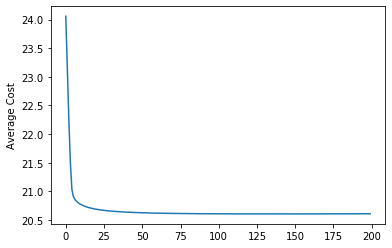

In [24]:
plt.plot(
    [i for i in range(len(NN._epochs))],
    [data['average_cost'] for data in NN._epochs]
)
plt.ylabel('Average Cost')
plt.show()